In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("customer_shopping_data.csv")

In [6]:
df.head(10)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,24/05/2022,Forum Istanbul
6,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,13/03/2022,Istinye Park
7,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,13/01/2021,Mall of Istanbul
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,4/11/2021,Metrocity
9,I326945,C283361,Female,60,Clothing,2,600.16,Credit Card,22/08/2021,Kanyon


In [8]:
df.isna().any()    # check missing values 

invoice_no        False
customer_id       False
gender            False
age               False
category          False
quantity          False
price             False
payment_method    False
invoice_date      False
shopping_mall     False
dtype: bool

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [10]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')

In [11]:
df['month'] = df['invoice_date'].dt.month

In [12]:
df['year'] = df['invoice_date'].dt.year

In [13]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,month,year
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,8,2022
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,12,2021
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,11,2021
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,5,2021
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,10,2021


In [14]:
df.describe()

,age,quantity,price,invoice_date,month,year
count,99457.000000,99457.000000,99457.000000,99457,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321,2022-02-04 02:46:59.783424,6.113898,2021.629408
min,18.000000,1.000000,5.230000,2021-01-01 00:00:00,1.000000,2021.000000
25%,30.000000,2.000000,45.450000,2021-07-19 00:00:00,3.000000,2021.000000
50%,43.000000,3.000000,203.300000,2022-02-05 00:00:00,6.000000,2022.000000
75%,56.000000,4.000000,1200.320000,2022-08-22 00:00:00,9.000000,2022.000000
max,69.000000,5.000000,5250.000000,2023-03-08 00:00:00,12.000000,2023.000000
std,14.990054,1.413025,941.184567,NaN,3.569511,0.636136


In [15]:
gender = df.groupby('gender')['gender'].value_counts().reset_index()
gender

,gender,count
0,Female,59482
1,Male,39975


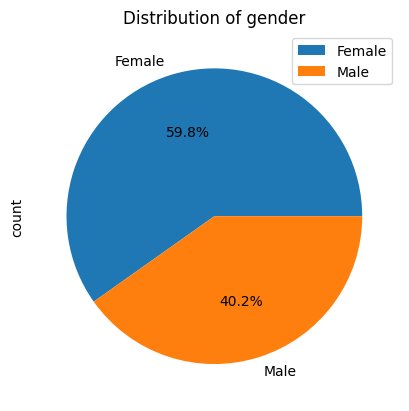

In [16]:
gender.plot.pie(y='count',labels=gender['gender'],autopct='%.1f%%')
plt.title('Distribution of gender')
plt.show()

In [ ]:
# reset_index Python is used to reset the index of a Pandas DataFrame. This can be useful for a number of reasons, such as:

# To make the DataFrame easier to work with, especially when joining or merging it with other DataFrames.
# To remove an existing index that is no longer needed.
# To reset the index to a specific set of values.

In [18]:
payment = df.groupby('payment_method')['payment_method'].value_counts().reset_index()
payment

,payment_method,count
0,Cash,44447
1,Credit Card,34931
2,Debit Card,20079


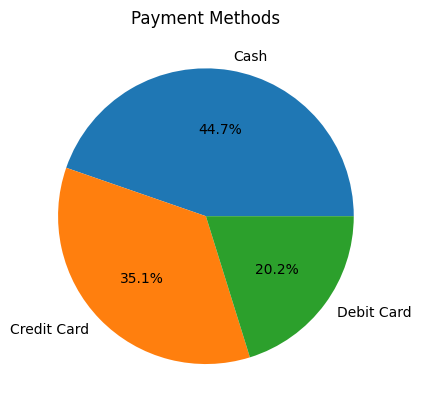

In [20]:
plt.pie(x=payment['count'],labels=payment['payment_method'],autopct='%.1f%%') # autopct means parameter of the pie chart
plt.title('Payment Methods')
plt.show()

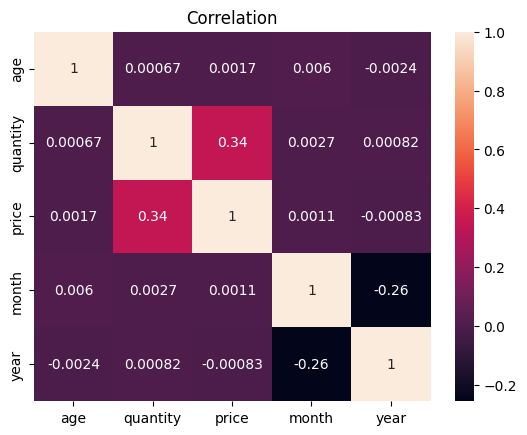

In [21]:
sns.heatmap(data=df.select_dtypes(include='number').corr(),annot=True)
plt.title('Correlation')
plt.show()

In [22]:
year = df.groupby(['year','gender'])['year'].count().reset_index(name='count')
year

,year,gender,count
0,2021,Female,27156
1,2021,Male,18226
2,2022,Female,27192
3,2022,Male,18359
4,2023,Female,5134
5,2023,Male,3390


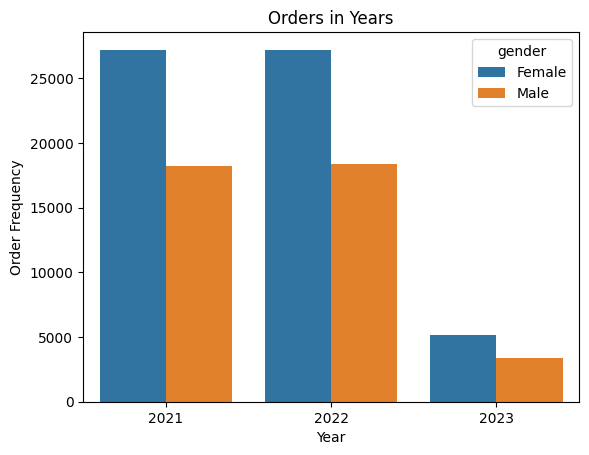

In [23]:
sns.barplot(data=year,x='year',y='count',hue='gender')
plt.xlabel('Year')
plt.ylabel('Order Frequency')
plt.title('Orders in Years')
plt.show()

In [24]:
month = df.groupby(['month','gender'])['month'].count().reset_index(name='count')
month

,month,gender,count
0,1,Female,6923
1,1,Male,4685
2,2,Female,6252
3,2,Male,4230
4,3,Female,5248
5,3,Male,3482
6,4,Female,4481
7,4,Male,3006
8,5,Female,4649
9,5,Male,3048


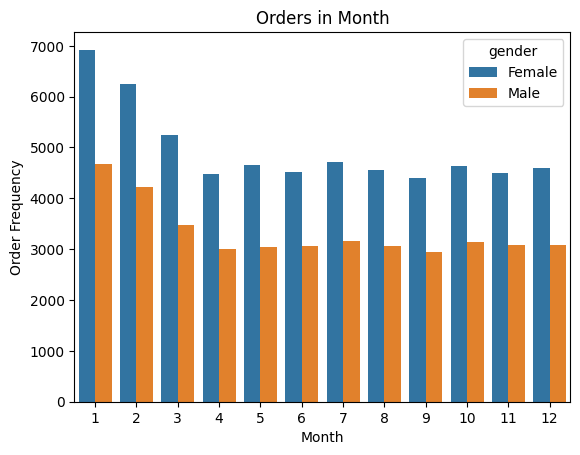

In [25]:
sns.barplot(data=month,x='month',y='count',hue='gender')
plt.xlabel('Month')
plt.ylabel('Order Frequency')
plt.title('Orders in Month')
plt.show()

In [31]:
payment_gender = df.groupby(['payment_method','gender'])['payment_method'].value_counts().reset_index()
payment_gender

,payment_method,gender,count
0,Cash,Female,26509
1,Cash,Male,17938
2,Credit Card,Female,21011
3,Credit Card,Male,13920
4,Debit Card,Female,11962
5,Debit Card,Male,8117


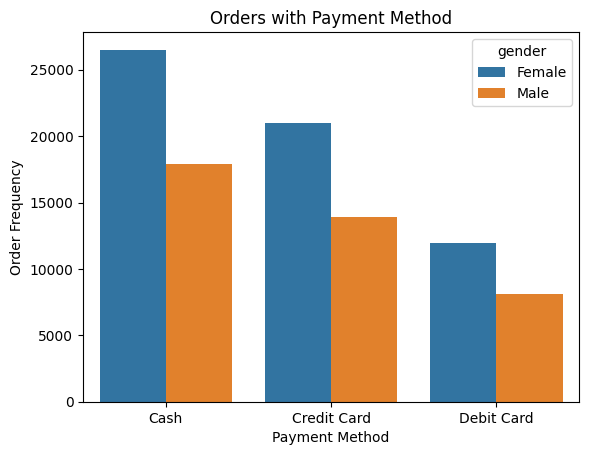

In [32]:
sns.barplot(data=payment_gender,x='payment_method',y='count',hue='gender')
plt.xlabel('Payment Method')
plt.ylabel('Order Frequency')
plt.title('Orders with Payment Method')
plt.show()

In [33]:
age = df.groupby(['age','gender'])['age'].value_counts().reset_index()
age.head()

,age,gender,count
0,18,Female,1079
1,18,Male,765
2,19,Female,1133
3,19,Male,803
4,20,Female,1102


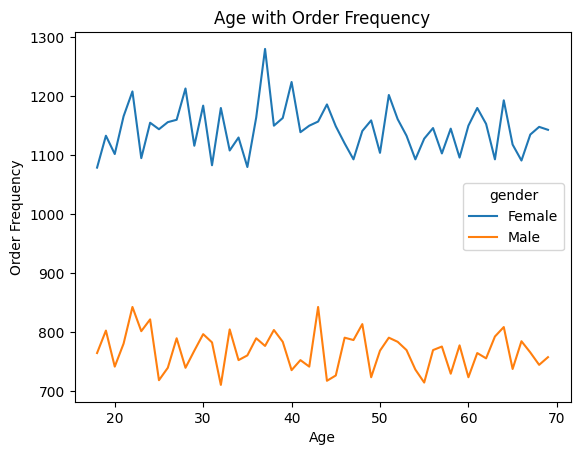

In [34]:
sns.lineplot(data=age,x='age',y='count',hue='gender')
plt.title('Age with Order Frequency')
plt.xlabel('Age')
plt.ylabel('Order Frequency')
plt.show()

In [35]:
category = df.groupby(['category','gender'])['category'].value_counts().reset_index()
category

,category,gender,count
0,Books,Female,2906
1,Books,Male,2075
2,Clothing,Female,20652
3,Clothing,Male,13835
4,Cosmetics,Female,9070
5,Cosmetics,Male,6027
6,Food & Beverage,Female,8804
7,Food & Beverage,Male,5972
8,Shoes,Female,5967
9,Shoes,Male,4067


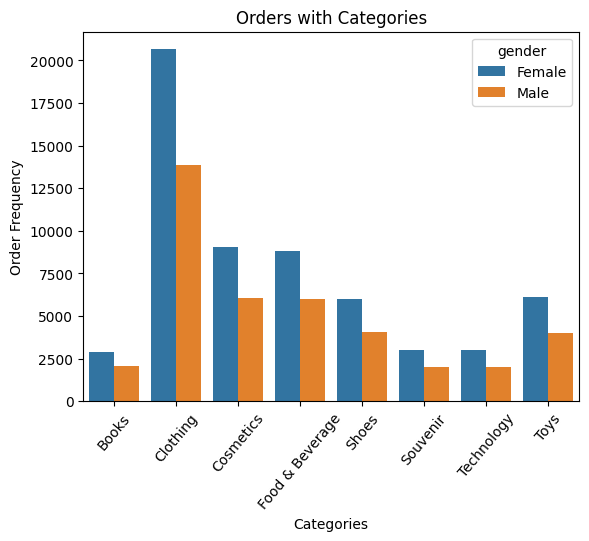

In [38]:
sns.barplot(data=category,x='category',y='count',hue='gender') # hue colour
plt.xlabel('Categories')
plt.ylabel('Order Frequency')
plt.title('Orders with Categories')
plt.xticks(rotation=50)
plt.show()

In [13]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


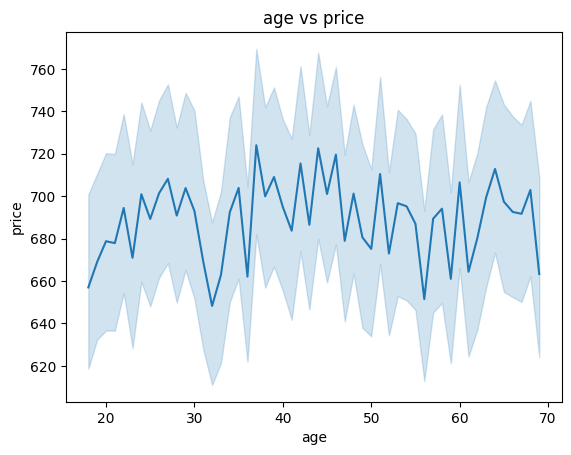

In [16]:
sns.lineplot(data=df,x='age',y='price')
plt.title('age vs price')
plt.show()

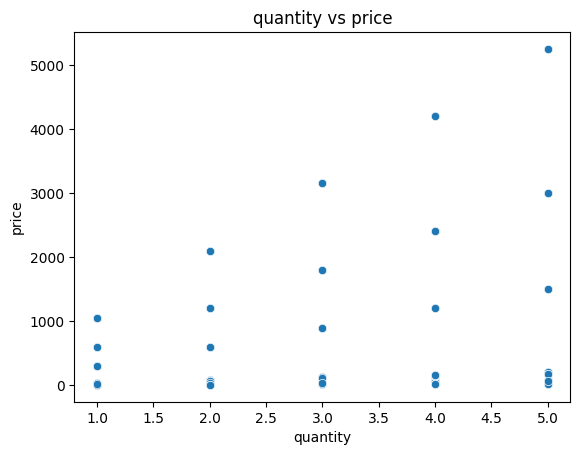

In [17]:
sns.scatterplot(data=df,x='quantity',y='price')
plt.title('quantity vs price')
plt.show()

In [18]:
mall = df.groupby(['shopping_mall','gender'])['shopping_mall'].value_counts().reset_index()
mall

,shopping_mall,gender,count
0,Cevahir AVM,Female,2940
1,Cevahir AVM,Male,2051
2,Emaar Square Mall,Female,2842
3,Emaar Square Mall,Male,1969
4,Forum Istanbul,Female,3016
5,Forum Istanbul,Male,1931
6,Istinye Park,Female,5874
7,Istinye Park,Male,3907
8,Kanyon,Female,11906
9,Kanyon,Male,7917


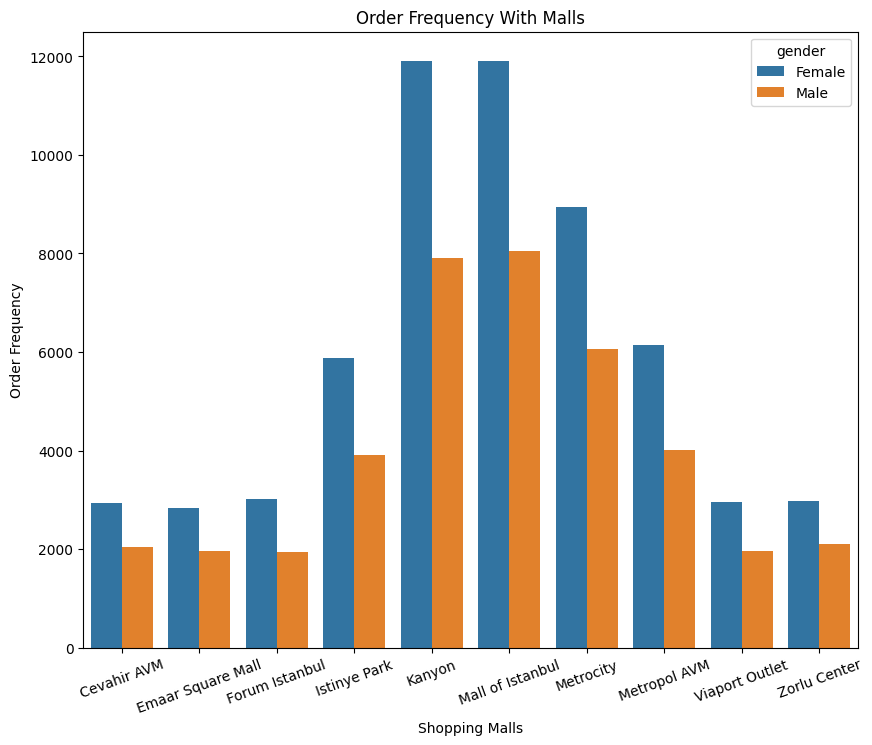

In [19]:
plt.figure(figsize=(10,8))
sns.barplot(data=mall,x='shopping_mall',y='count',hue='gender')
plt.xlabel('Shopping Malls')
plt.ylabel('Order Frequency')
plt.xticks(rotation=20)
plt.title('Order Frequency With Malls')
plt.show()